<a href="https://colab.research.google.com/github/pjablonski123/alk_eye-tech/blob/master/eva_alk_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.applications.inception_v3 import InceptionV3 
from keras.layers import Dense, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Model 
from keras import optimizers 
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import load_model

Using TensorFlow backend.


In [2]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [2]:
base_model = InceptionV3(weights='imagenet', include_top=True)
base_model.summary()


96116736/96112376 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
______________________

In [0]:
# pre-trained Inception V3 model 
base_model = InceptionV3(weights='imagenet', include_top=False) 

base_model.trainable = False

x = base_model.output 

x = GlobalAveragePooling2D()(x) 
x = Dense(64, activation='relu')(x) 
predictions = Dense(2, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=predictions) 

model.trainable = True

adam = optimizers.adam(lr=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_dir = '/content/drive/My Drive/TEST1/' 
test_dir = '/content/drive/My Drive/TEST2/'

In [9]:
train_generator = train_datagen.flow_from_directory( train_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

test_generator = test_datagen.flow_from_directory( test_dir,
  target_size=(299, 299), batch_size=10, class_mode='categorical')

Found 500 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [0]:
# Setup a callback to save the best model 
callbacks = [keras.callbacks.ModelCheckpoint(
  'model.{epoch:02d}-{val_accuracy:.2f}.hdf5', 
  monitor='val_accuracy', verbose=1, save_best_only=True, 
  mode='max', period=1)]

In [11]:
history = model.fit_generator(train_generator, verbose=1, 
  steps_per_epoch=len(train_generator), epochs=100,
  validation_data=test_generator,
  validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - 331s 7s/step - loss: 1.0076 - accuracy: 0.5180 - val_loss: 821960114176.0000 - val_accuracy: 0.5484

Epoch 00001: val_accuracy improved from -inf to 0.54839, saving model to model.01-0.55.hdf5
Epoch 2/100
50/50 [==============================] - 14s 289ms/step - loss: 0.6989 - accuracy: 0.4980 - val_loss: 2776586.5000 - val_accuracy: 0.4516

Epoch 00002: val_accuracy did not improve from 0.54839
Epoch 3/100
50/50 [==============================] - 14s 284ms/step - loss: 0.6766 - accuracy: 0.5400 - val_loss: 0.0000e+00 - val_accuracy: 0.5484

Epoch 00003: val_accuracy did not improve from 0.54839
Epoch 4/100
50/50 [==============================] - 14s 282ms/step - loss: 0.6598 - accuracy: 0.6040 - val_loss: 0.0000e+00 - val_accuracy: 0.5161

Epoch 00004: val_accuracy did not improve from 0.54839
Epoch 5/100
50/50 [==============================] - 14s 280ms/step - loss: 0.6128 - accuracy: 0.6780 - val_loss: 0.3264 - val_accuracy: 0.6

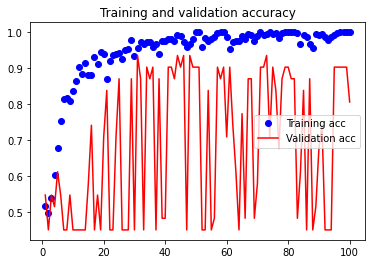

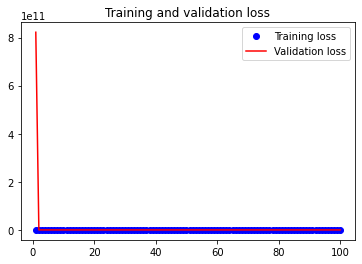

In [12]:
def plot_history(history): 
    acc = history.history['accuracy'] 
    val_acc = history.history['val_accuracy'] 
    loss = history.history['loss'] 
    val_loss = history.history['val_loss'] 
    epochs = range(1, len(acc) + 1) 
    
    plt.figure() 
    plt.title('Training and validation accuracy') 
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', \
      label='Validation acc') 
    plt.legend() 
    plt.show() 
   
    plt.figure() 
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', \
      label='Validation loss') 
    plt.legend() 
    plt.show() 
    return acc, val_acc, loss, val_loss 

acc, val_acc, loss, val_loss = plot_history(history)

In [14]:
cd '/content/drive/My Drive/TEST1'

/content/drive/My Drive/TEST1


In [0]:
model = load_model('model.31-0.94.hdf5')

In [10]:
model = load_model('model.01-0.67.hdf5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [0]:
classes = ['CNV',  'NORMAL']

def preprocess_input(x):
    x = img_to_array(x) / 255.
    return np.expand_dims(x, axis=0) 

# Prediction for an image path in the local directory
def predict_from_image_path(image_path):
    return predict_image(load_img(image_path, target_size=(299, 299)))

# Prediction for an image URL path
def predict_from_image_url(image_url):
    res = requests.get(image_url)
    im = Image.open(BytesIO(res.content))
    return predict_from_image_path(im.fp)
    
# Predict an image
def predict_image(im):
    x = preprocess_input(im)
    pred = np.argmax(model.predict(x))
    return pred, classes[pred]

In [22]:
#Picture with CNV
print(predict_from_image_path('/content/drive/My Drive/TEST2/CNV/test2c.jpeg'))

(0, 'CNV')


In [23]:
#Picture without an eye disease
print(predict_from_image_path('/content/drive/My Drive/TEST2/CNV/test1n.jpeg'))

(1, 'NORMAL')


In [28]:
#CNV again
print(predict_from_image_path('/content/drive/My Drive/TEST2/CNV/no-disease-cnv-28682-8.jpeg'))

(0, 'CNV')
